http://cs229.stanford.edu/ps/ps2/ps2.pdf

# (a)

### Theory

For Navie Bayes represented as a multinomial event model, to maximize its maxmimum likelihood with Laplace smoothing,

\begin{align*}
\phi_{k|y=1} &= \frac{\sum_{i=1}^{m} \sum_{j=1}^{n_i} \boldsymbol{1} \{ x_j^{(i)} = k \wedge y^{(i)} =1 \} + 1}{\sum_{i=1}^{m} \boldsymbol{1} \{ y^{(i)} = 1 \} n_i + \left| V \right|} \\
\phi_{k|y=0} &= \frac{\sum_{i=1}^{m} \sum_{j=1}^{n_i} \boldsymbol{1} \{ x_j^{(i)} = k \wedge y^{(i)} =0 \} + 1}{\sum_{i=1}^{m} \boldsymbol{1} \{ y^{(i)} = 0 \} n_i + \left| V \right|} \\
\phi_{y} &= \frac{\sum_{i=1}^{m} \boldsymbol{1} \{ y^{(i)} = 1 \}}{m}
\end{align*}

For prediction,

\begin{align*}
p(y=1|x) &= \frac{p(x|y=1)p(y=1)}{p(x)} \\
              &= \frac{p(x|y=1)p(y=1)}{p(x|y=1)p(y=1) + p(x|y=0) p(y=0)} \\
              &= \frac{1}{1 + \frac{p(x|y=0) p(y=0)}{p(x|y=1) p(y=1)}} \\
              &= \frac{1}{1 + \mathrm{exp} (\mathrm{log}P(x|y=0) + \mathrm{log}P(y=0) - \mathrm{log}P(x|y=1) - \mathrm{log} P(y=1))}
\end{align*}

The last two equalities are for numerical stability

See implementation in `nb.py`

# (b)

In [1]:
import glob

import numpy as np
import matplotlib.pyplot as plt

import nb

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
trainMatrix, tokenlist, trainCategory = nb.readMatrix('spam_data/MATRIX.TRAIN')

In [3]:
state = nb.nb_train(trainMatrix, trainCategory)

In [4]:
state.keys()

dict_keys(['phi_yeq1', 'phi_yeq0', 'phi'])

In [5]:
tokens = np.array(tokenlist)
tokens[np.argsort(state['phi_yeq1'] / state['phi_yeq0'])[::-1]][:50]

array(['httpaddr', 'spam', 'unsubscrib', 'ebai', 'valet', 'diploma', 'dvd',
       'websit', 'click', 'lowest', 'numberpx', 'arial', 'helvetica',
       'serif', 'nashua', 'amherst', 'mortgag', 'refin', 'charset',
       'newslett', 'customerservic', 'numberpt', 'iso', 'web', 'lender',
       'numberd', 'loan', 'dailybargainmail', 'coral', 'html', 'unsolicit',
       'www', 'fl', 'holidai', 'equiti', 'tal', 'consolid', 'bachelor',
       'sweepstak', 'subscript', 'mba', 'bonu', 'ae', 'refinanc', 'hover',
       'mime', 'untitl', 'subscrib', 'recur', 'postal'],
      dtype='<U16')

These are the top words most indicative of spam emails, kind of makes sense.

# (c)

In [16]:
files = sorted(glob.glob('./spam_data/MATRIX.TRAIN.[0-9]*'), key=lambda s: int(s.rsplit('.')[-1]))

nb_sizes = []
nb_errs = []
mat_test, tok_test, cat_test = nb.readMatrix('./spam_data/MATRIX.TEST')
for f in files:
    mat, tok, cat = nb.readMatrix(f)
    nb_sizes.append(mat.shape[0])
    mod = nb.nb_train(mat, cat)
    output = nb.nb_test(mat_test, mod)
    nb_errs.append(nb.evaluate(output, cat_test))

Error: 0.0387
Error: 0.0262
Error: 0.0262
Error: 0.0187
Error: 0.0175
Error: 0.0163


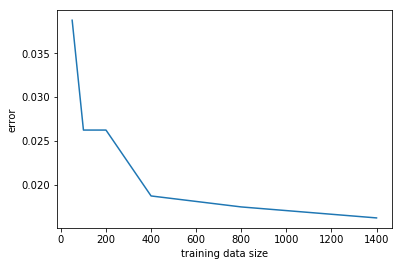

In [17]:
plt.plot(nb_sizes, nb_errs)
plt.xlabel('training set size')
plt.ylabel('error')

# (d)

In [8]:
import svm

In [18]:
files = sorted(glob.glob('./spam_data/MATRIX.TRAIN.[0-9]*'), key=lambda s: int(s.rsplit('.')[-1]))

svm_sizes = []
svm_errs = []
mat_test, tok_test, cat_test = svm.readMatrix('./spam_data/MATRIX.TEST')
for f in files:
    mat, tok, cat = svm.readMatrix(f)
    svm_sizes.append(mat.shape[0])
    mod = svm.svm_train(mat, cat)
    output = svm.svm_test(mat_test, mod)
    svm_errs.append(svm.evaluate(output, cat_test))

Error: 0.0225
Error: 0.0200
Error: 0.0025
Error: 0.0037
Error: 0.0000
Error: 0.0000


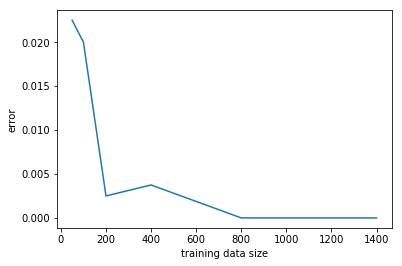

In [19]:
plt.plot(svm_sizes, svm_errs)
plt.xlabel('training set size')
plt.ylabel('error')

# (e)

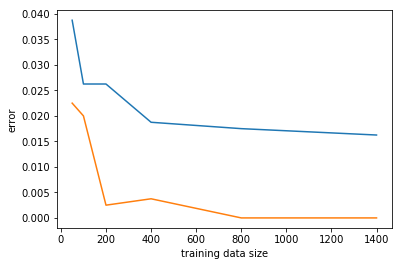

In [20]:
plt.plot(nb_sizes, nb_errs, label='navie bayes')
plt.plot(svm_sizes, svm_errs, label='svm')
plt.xlabel('training set size')
plt.ylabel('error')
plt.legend()

SVM outperforms NB at each training set size